# Fitness Data Regression

## 데이터 불러오기 

In [2]:
fitness=read.csv("fitness.csv", header=T)
str(fitness)

'data.frame':	31 obs. of  7 variables:
 $ Age      : int  44 40 44 42 38 47 40 43 44 38 ...
 $ Weight   : num  89.5 75.1 85.8 68.2 89 ...
 $ Oxygen   : num  44.6 45.3 54.3 59.6 49.9 ...
 $ RunTime  : num  11.37 10.07 8.65 8.17 9.22 ...
 $ RestPulse: int  62 62 45 40 55 58 70 64 63 48 ...
 $ RunPulse : int  178 185 156 166 178 176 176 162 174 170 ...
 $ MaxPulse : int  182 185 168 172 180 176 180 170 176 186 ...


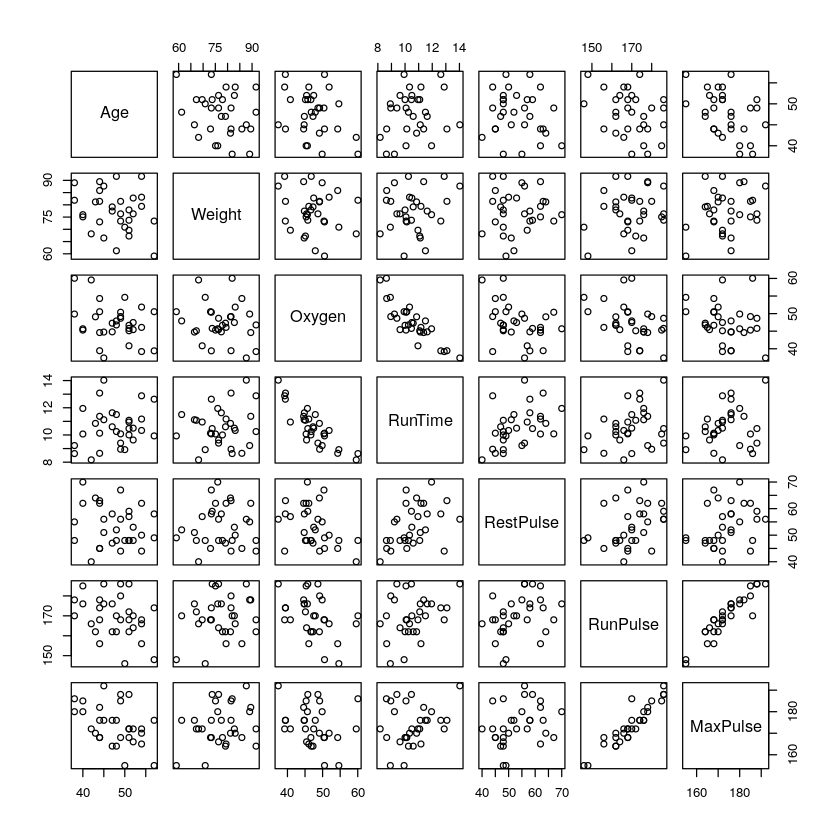

In [2]:
pairs(fitness)

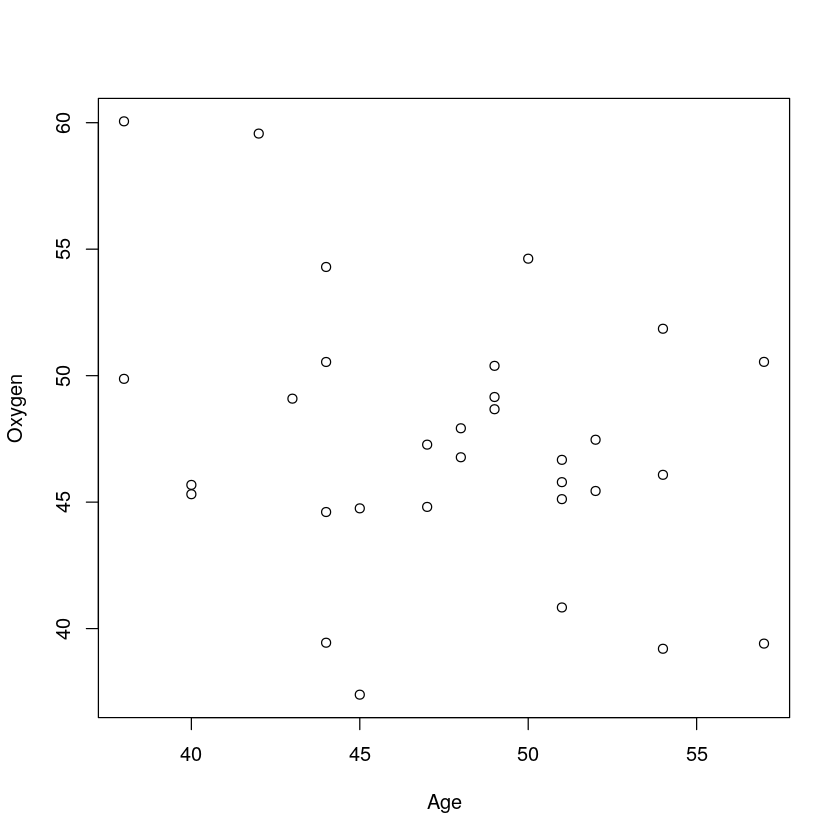

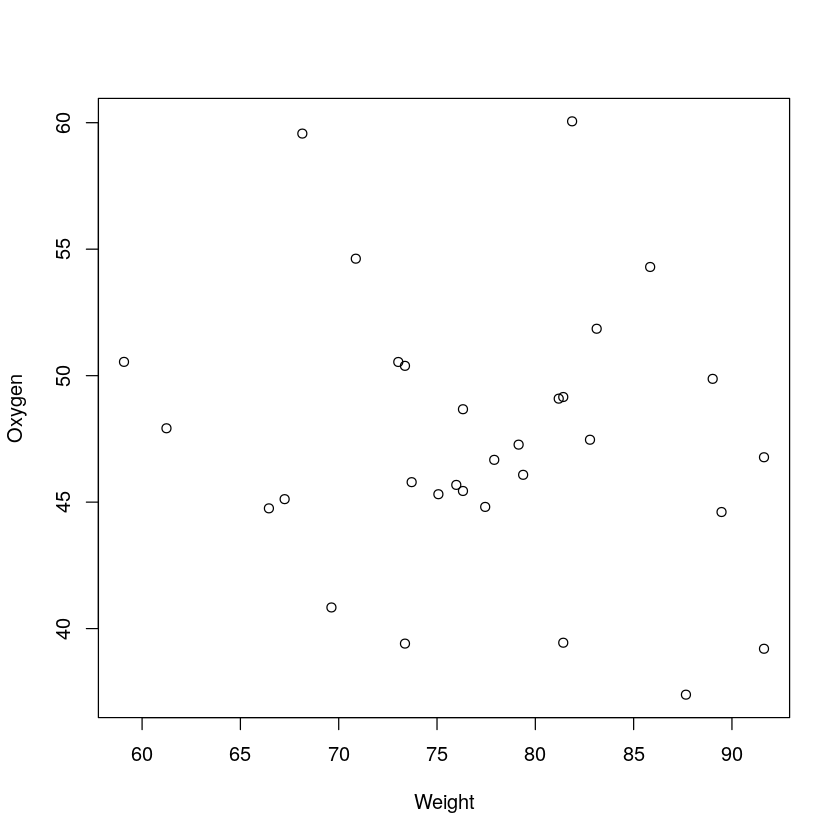

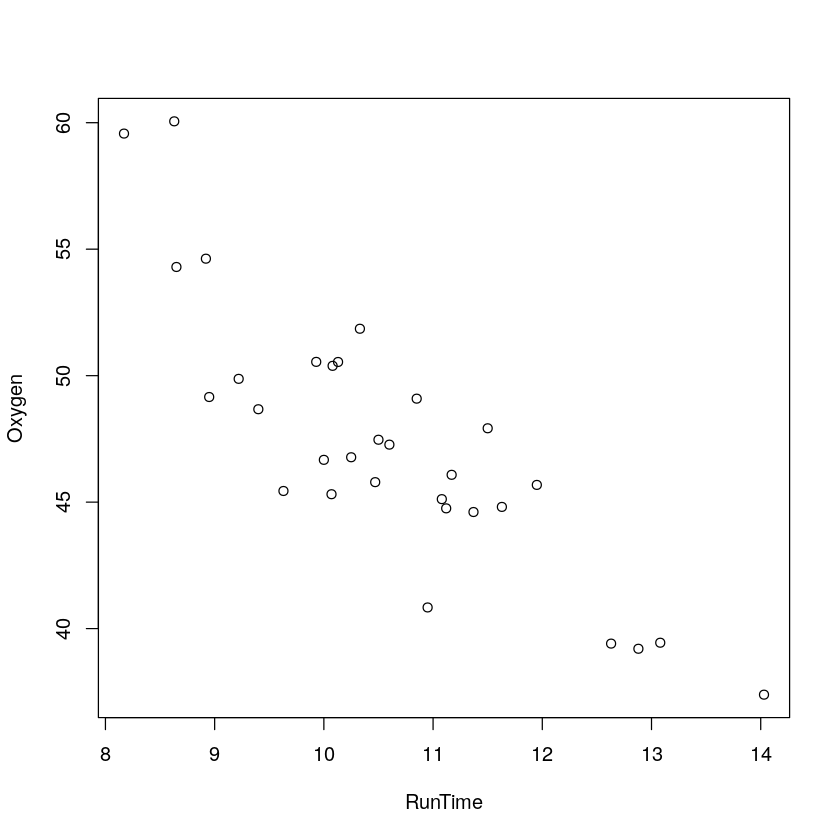

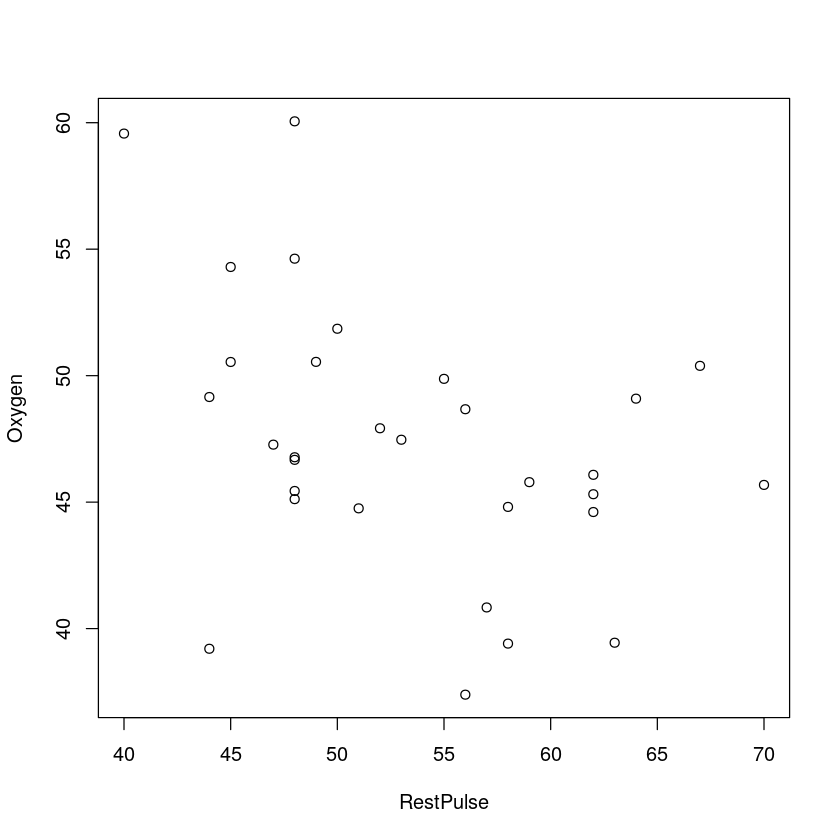

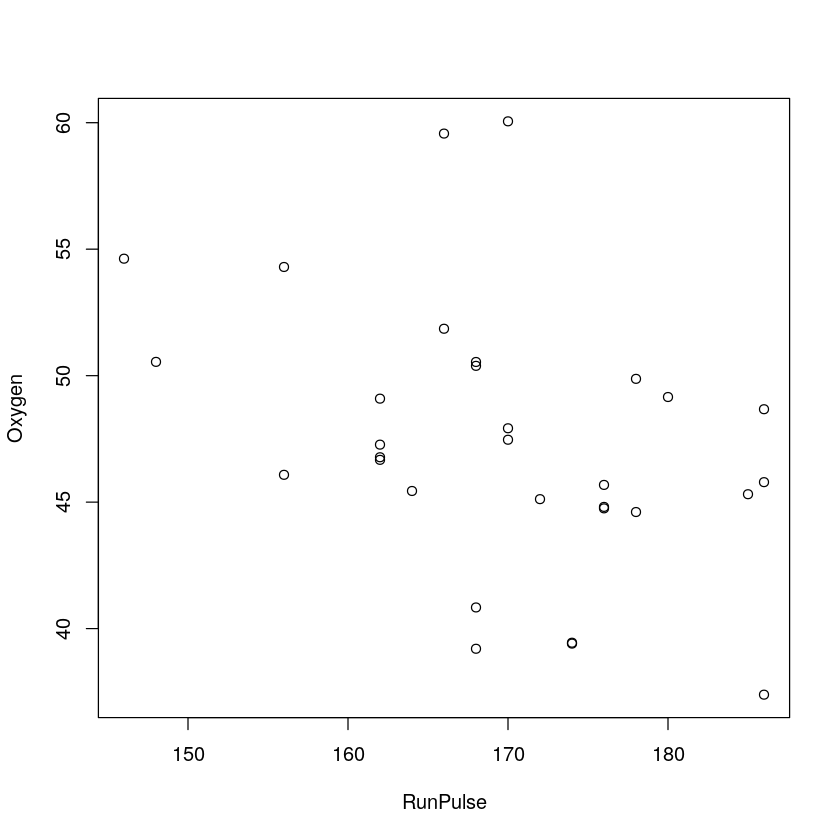

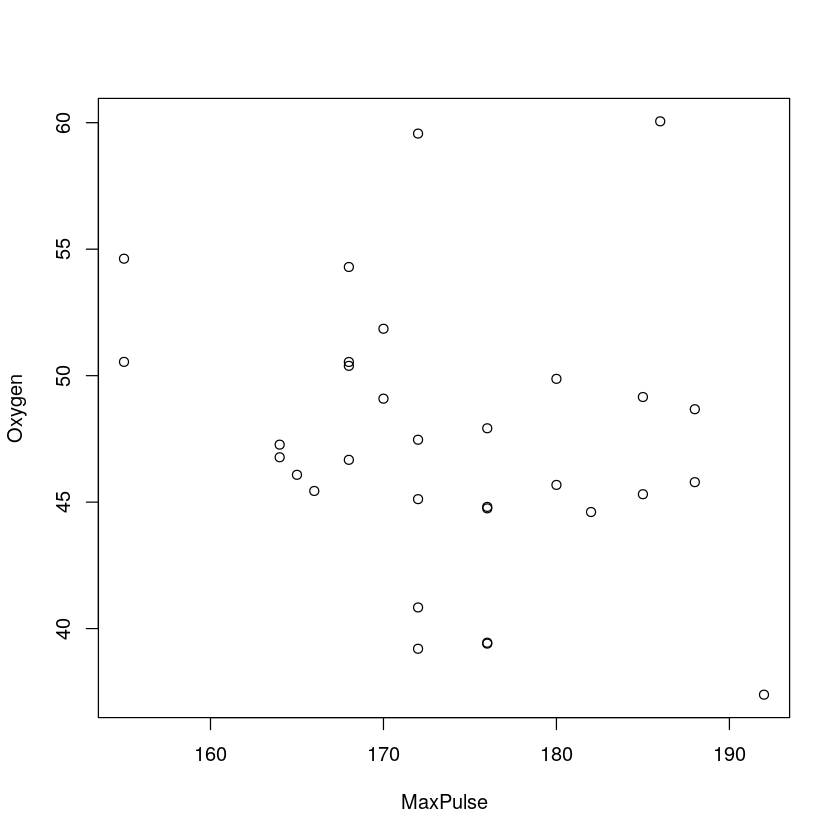

In [3]:
plot(Oxygen~., data=fitness)

In [4]:
cor(fitness)

,Age,Weight,Oxygen,RunTime,RestPulse,RunPulse,MaxPulse
Age,1.0000000,-0.23353903,-0.3045924,0.1887453,-0.16409995,-0.3378703,-0.4329159
Weight,-0.2335390,1.00000000,-0.1627528,0.1435076,0.04397417,0.1815163,0.2493812
Oxygen,-0.3045924,-0.16275285,1.0000000,-0.8621949,-0.39935611,-0.3979742,-0.2367402
RunTime,0.1887453,0.14350758,-0.8621949,1.0000000,0.45038260,0.3136478,0.2261030
RestPulse,-0.1640999,0.04397417,-0.3993561,0.4503826,1.00000000,0.3524606,0.3051240
RunPulse,-0.3378703,0.18151633,-0.3979742,0.3136478,0.35246060,1.0000000,0.9297538
MaxPulse,-0.4329159,0.24938123,-0.2367402,0.2261030,0.30512400,0.9297538,1.0000000


## simple regression model 

In [3]:
fit=lm(Oxygen~., data=fitness)

In [4]:
summary(fit)


Call:
lm(formula = Oxygen ~ ., data = fitness)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4026 -0.8991  0.0706  1.0496  5.3847 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 102.93448   12.40326   8.299 1.64e-08 ***
Age          -0.22697    0.09984  -2.273  0.03224 *  
Weight       -0.07418    0.05459  -1.359  0.18687    
RunTime      -2.62865    0.38456  -6.835 4.54e-07 ***
RestPulse    -0.02153    0.06605  -0.326  0.74725    
RunPulse     -0.36963    0.11985  -3.084  0.00508 ** 
MaxPulse      0.30322    0.13650   2.221  0.03601 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.317 on 24 degrees of freedom
Multiple R-squared:  0.8487,	Adjusted R-squared:  0.8108 
F-statistic: 22.43 on 6 and 24 DF,  p-value: 9.715e-09


R-square는  84%, 베타값은 알아서 해석 <br>
f검정 결과는 적어도 하나의 유의미한 계수가 있다. <br>
t검정 결과는 각각 볼 것

In [6]:
names(fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

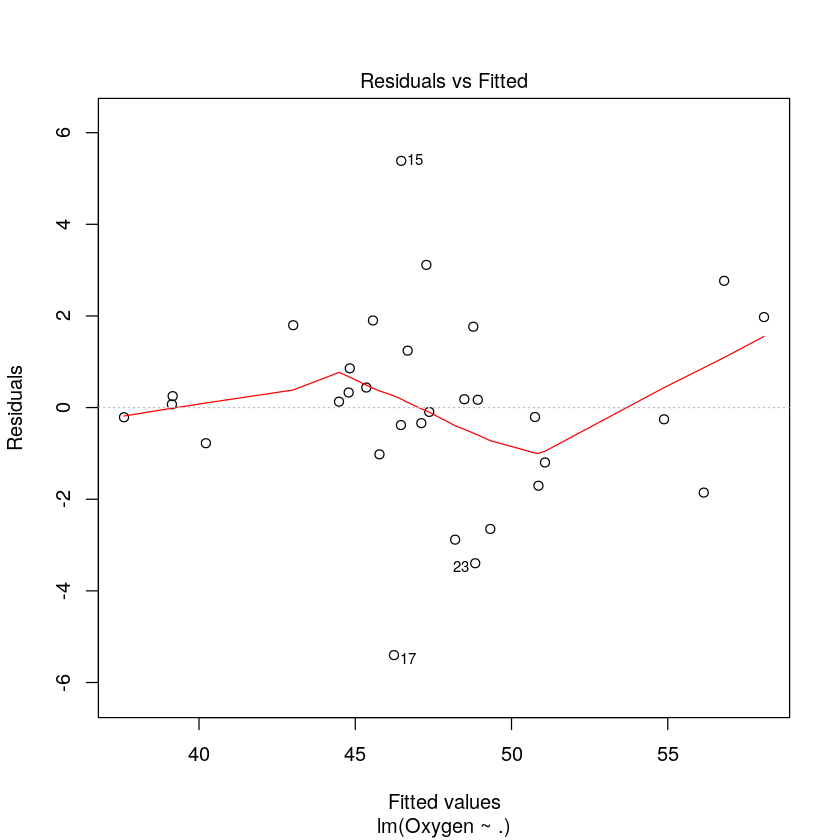

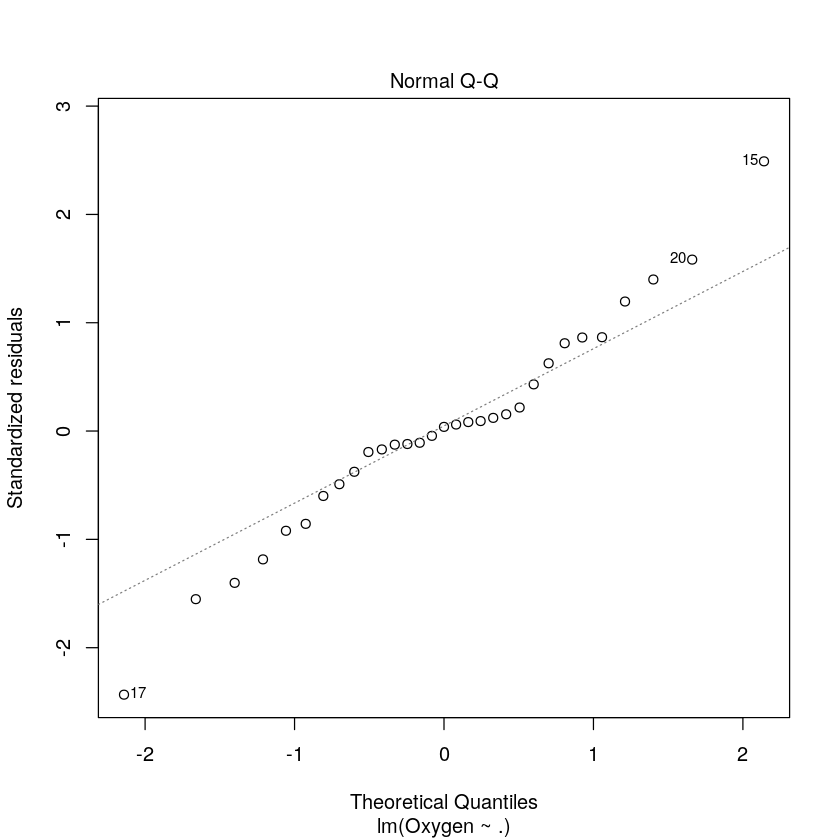

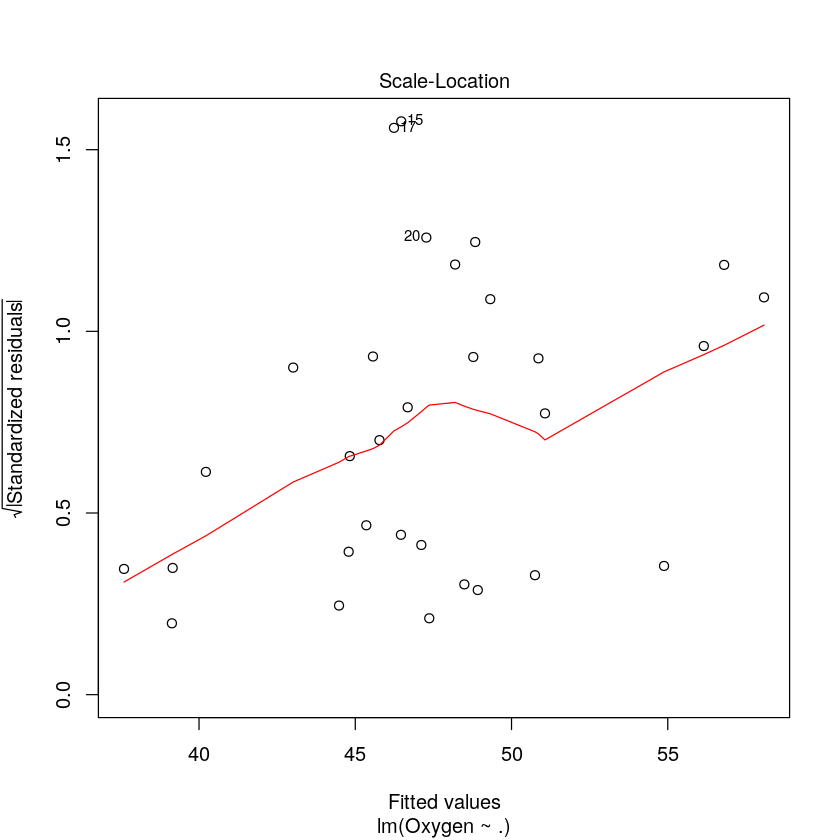

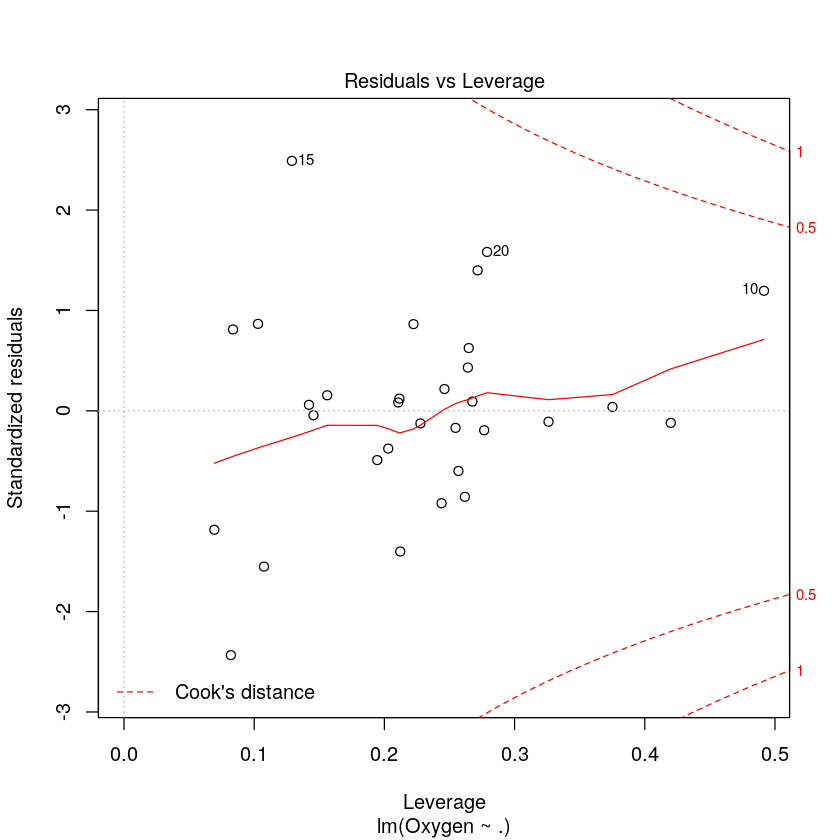

In [7]:
plot(fit)

## 변수선택법 

AIC(Akaike Information Criterion), BIC(Bayes Information Criterion)를 기준으로 이를 최소화하는 선택함

### 전진선택 forward 

In [8]:
fit.forward=step(fit, direction = "forward")

Start:  AIC=58.16
Oxygen ~ Age + Weight + RunTime + RestPulse + RunPulse + MaxPulse



### 후진제거 backward 

In [9]:
fit.backward=step(fit, direction = "backward")

Start:  AIC=58.16
Oxygen ~ Age + Weight + RunTime + RestPulse + RunPulse + MaxPulse

            Df Sum of Sq    RSS    AIC
- RestPulse  1     0.571 129.41 56.299
<none>                   128.84 58.162
- Weight     1     9.911 138.75 58.459
- MaxPulse   1    26.491 155.33 61.958
- Age        1    27.746 156.58 62.208
- RunPulse   1    51.058 179.90 66.510
- RunTime    1   250.822 379.66 89.664

Step:  AIC=56.3
Oxygen ~ Age + Weight + RunTime + RunPulse + MaxPulse

           Df Sum of Sq    RSS    AIC
<none>                  129.41 56.299
- Weight    1      9.52 138.93 56.499
- MaxPulse  1     26.83 156.23 60.139
- Age       1     27.37 156.78 60.247
- RunPulse  1     52.60 182.00 64.871
- RunTime   1    320.36 449.77 92.917


### 단계선택 stepwise 

In [10]:
fit.step=step(fit, direction = "both")

Start:  AIC=58.16
Oxygen ~ Age + Weight + RunTime + RestPulse + RunPulse + MaxPulse

            Df Sum of Sq    RSS    AIC
- RestPulse  1     0.571 129.41 56.299
<none>                   128.84 58.162
- Weight     1     9.911 138.75 58.459
- MaxPulse   1    26.491 155.33 61.958
- Age        1    27.746 156.58 62.208
- RunPulse   1    51.058 179.90 66.510
- RunTime    1   250.822 379.66 89.664

Step:  AIC=56.3
Oxygen ~ Age + Weight + RunTime + RunPulse + MaxPulse

            Df Sum of Sq    RSS    AIC
<none>                   129.41 56.299
- Weight     1      9.52 138.93 56.499
+ RestPulse  1      0.57 128.84 58.162
- MaxPulse   1     26.83 156.23 60.139
- Age        1     27.37 156.78 60.247
- RunPulse   1     52.60 182.00 64.871
- RunTime    1    320.36 449.77 92.917


restpulse가 제거되었다.

#### Stepwise의 ANOVA 

In [11]:
fit.step$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,24,128.8379,58.16161
- RestPulse,1,0.570513,25,129.4085,56.29858


stepwise의 결과의 ANOVA로 RestPulse 변수만 제거되었다.

# Housing Data Regression

## 데이터 불러오기 

In [12]:
housing=read.csv("housing.csv", header=T)
str(housing)

'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [13]:
housing$CHAS=as.factor(housing$CHAS)

## split data

In [14]:
set.seed(1234567) 
ind <- sample(2, nrow(housing), replace=TRUE, prob=c(0.7, 0.3))
trainData <- housing[ind==1,]
testData <- housing[ind==2,]

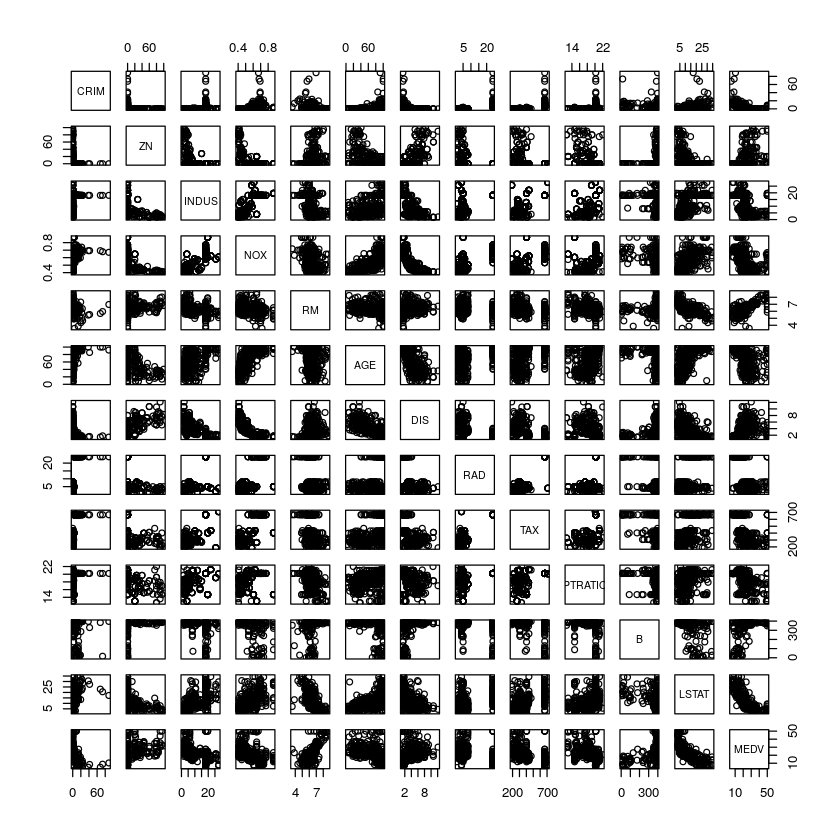

In [15]:
pairs(trainData[,-4])  # CHAS 제외

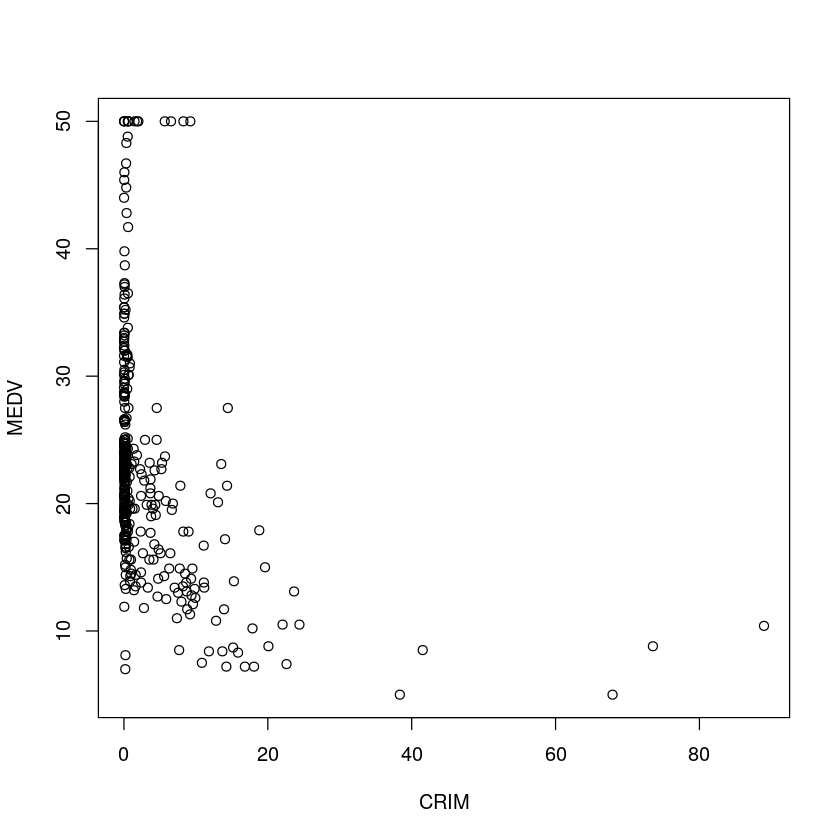

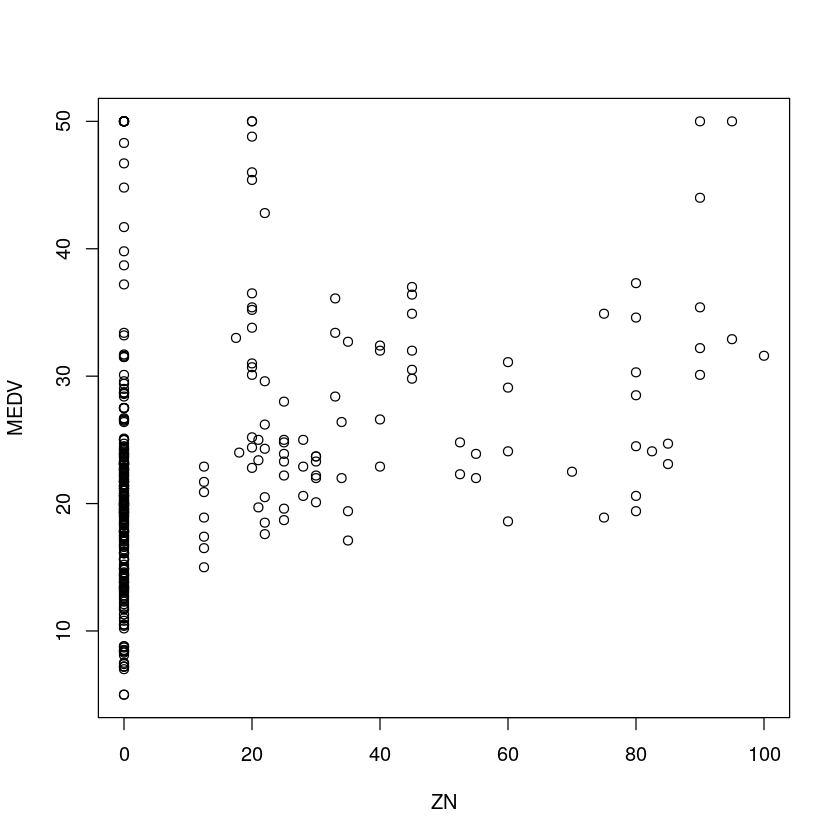

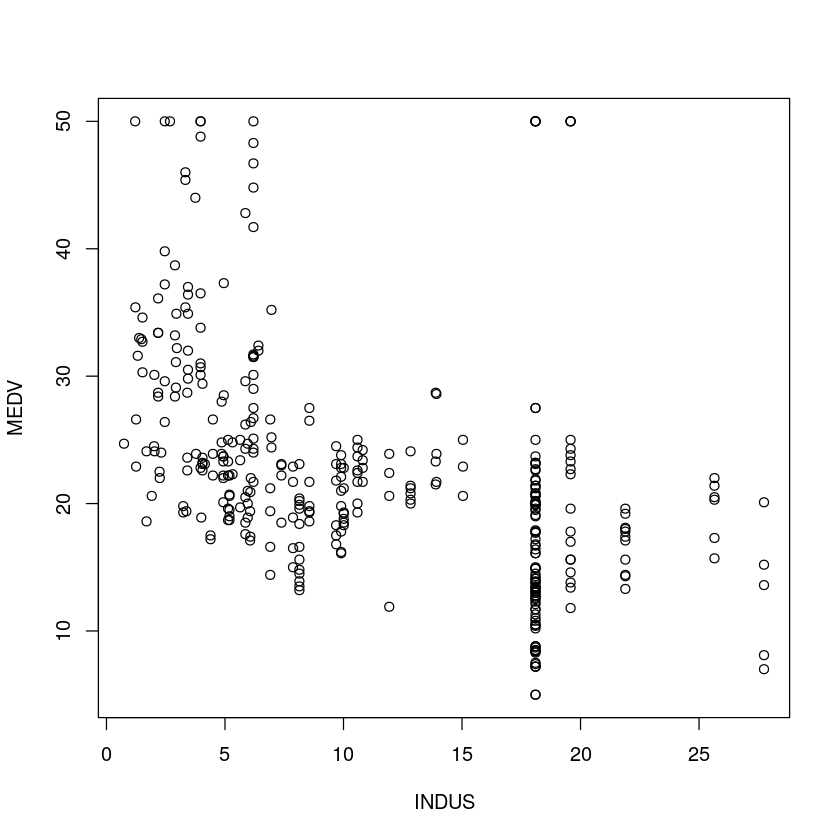

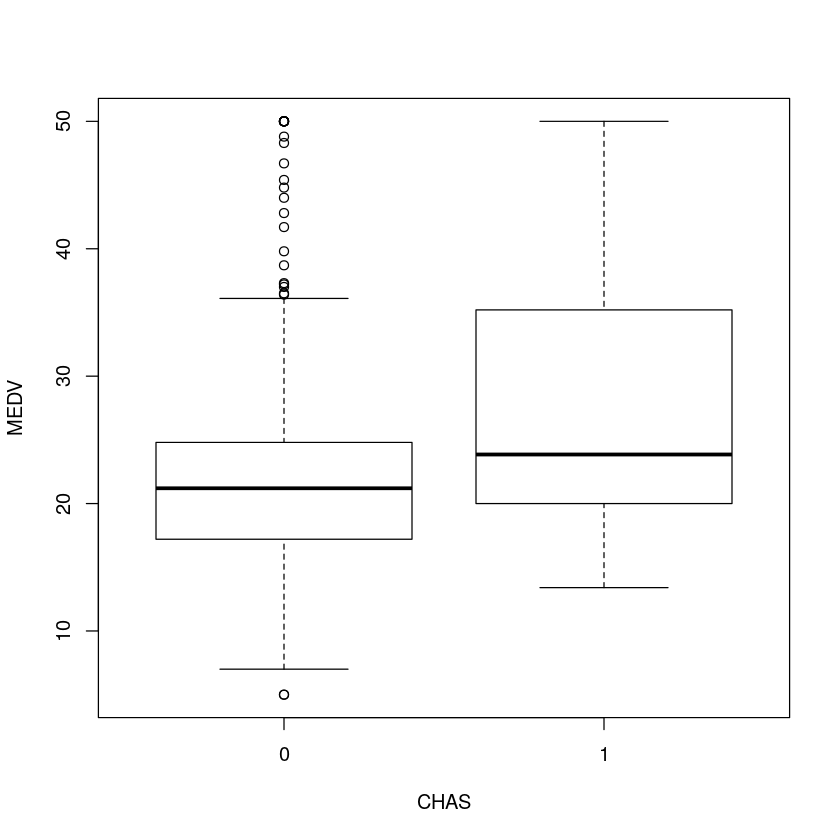

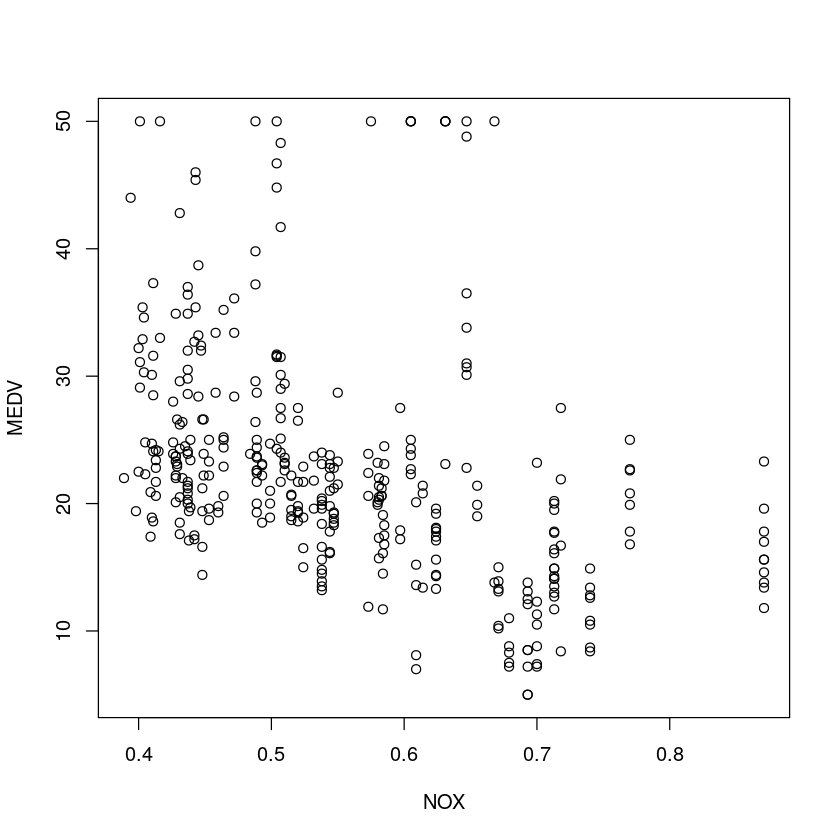

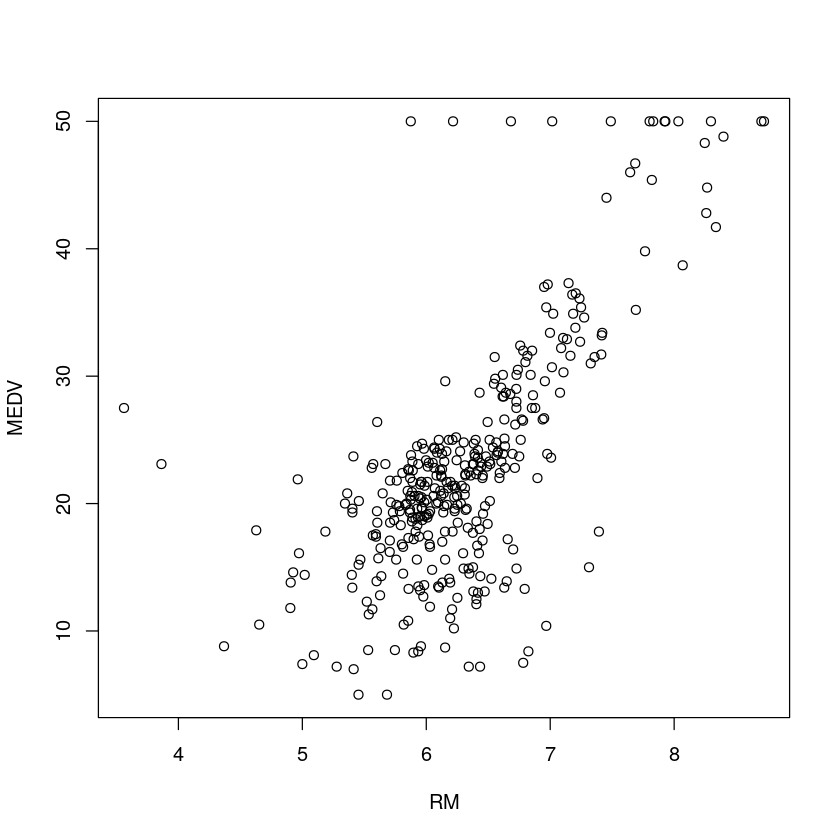

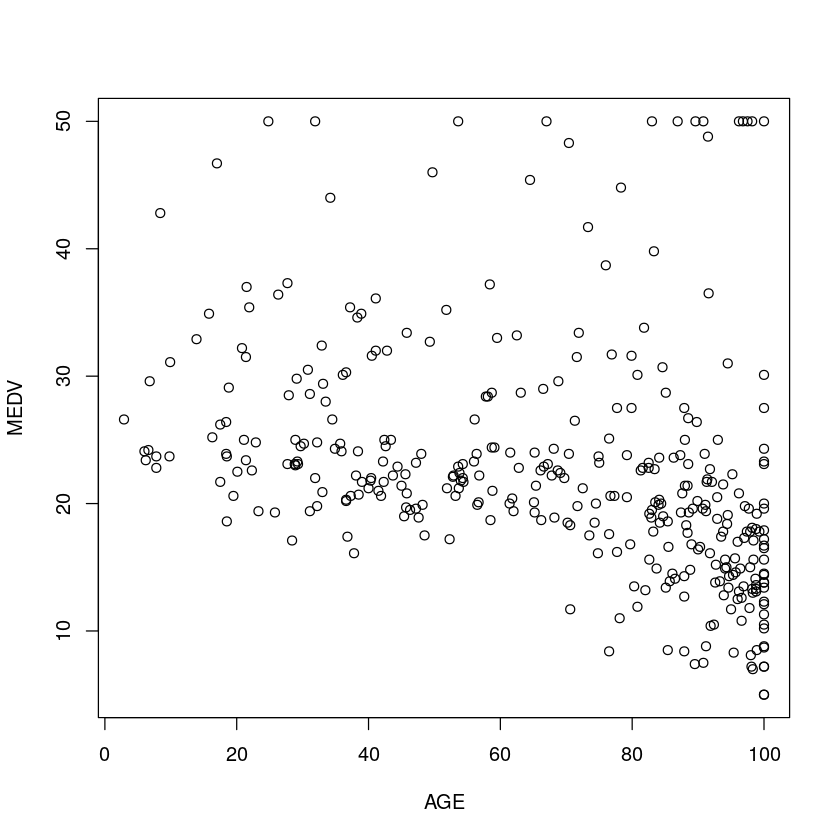

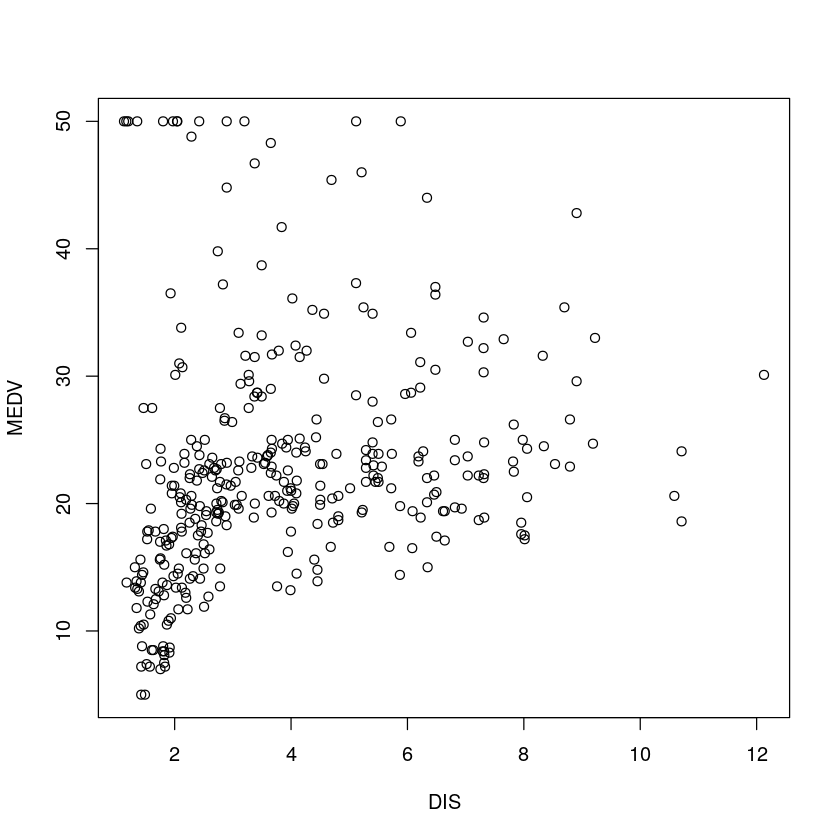

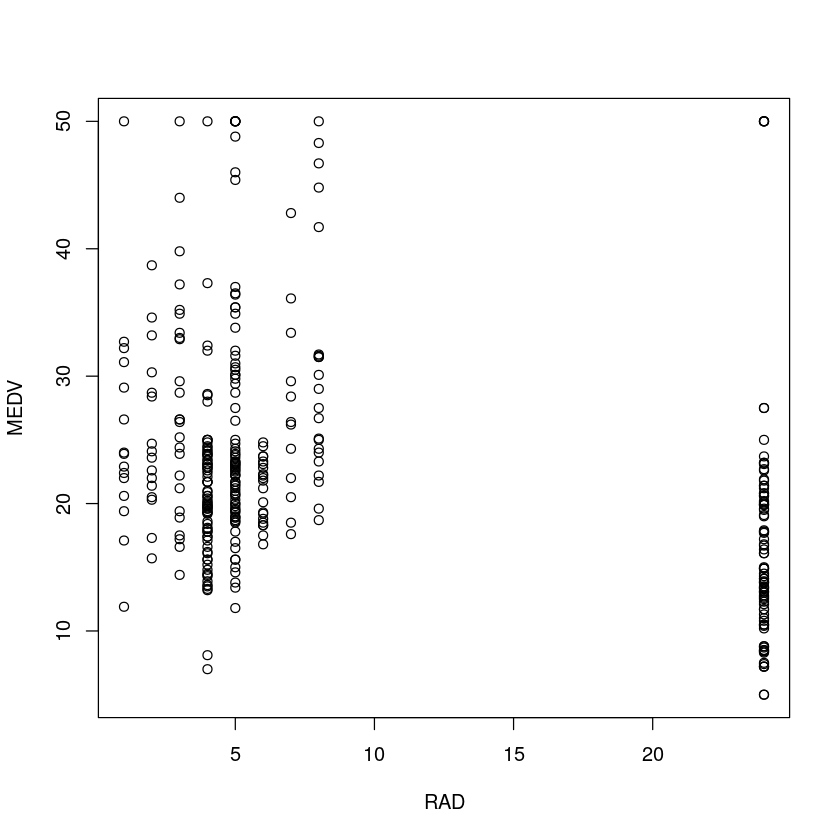

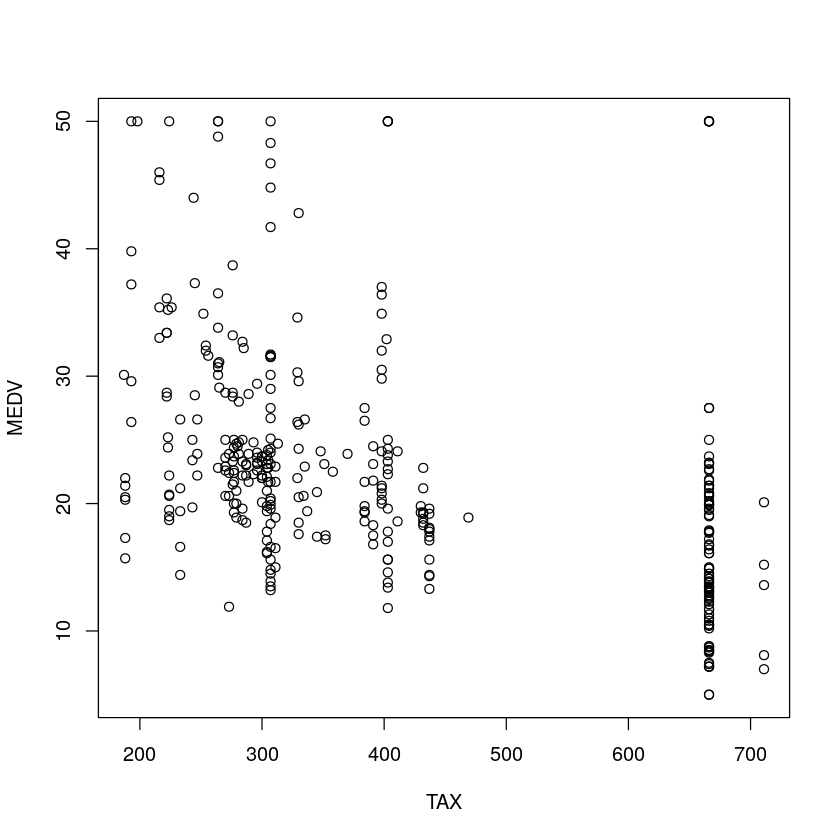

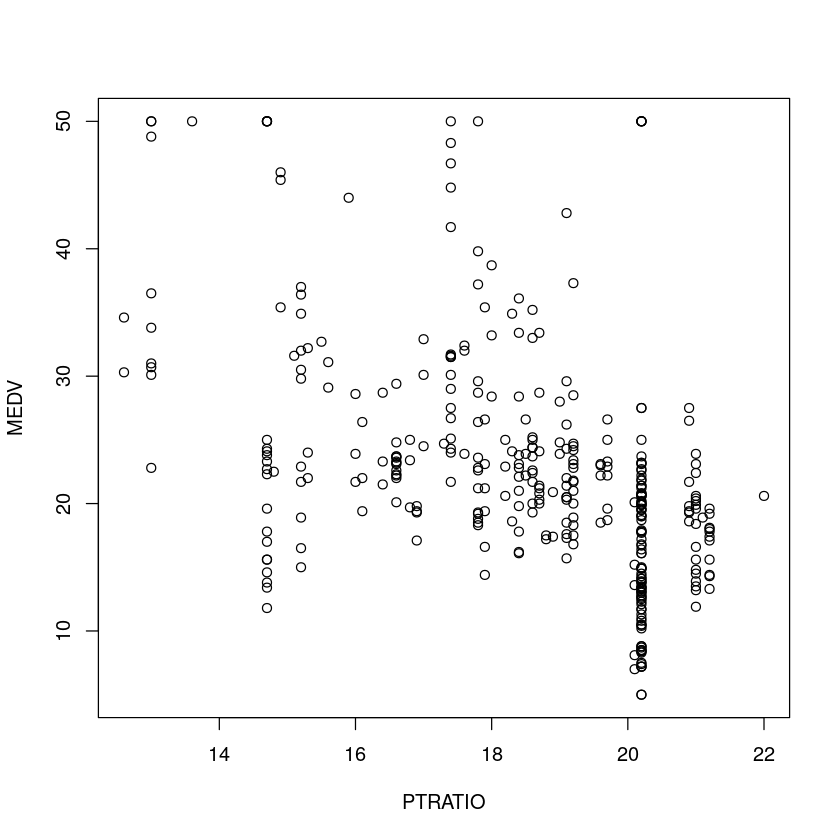

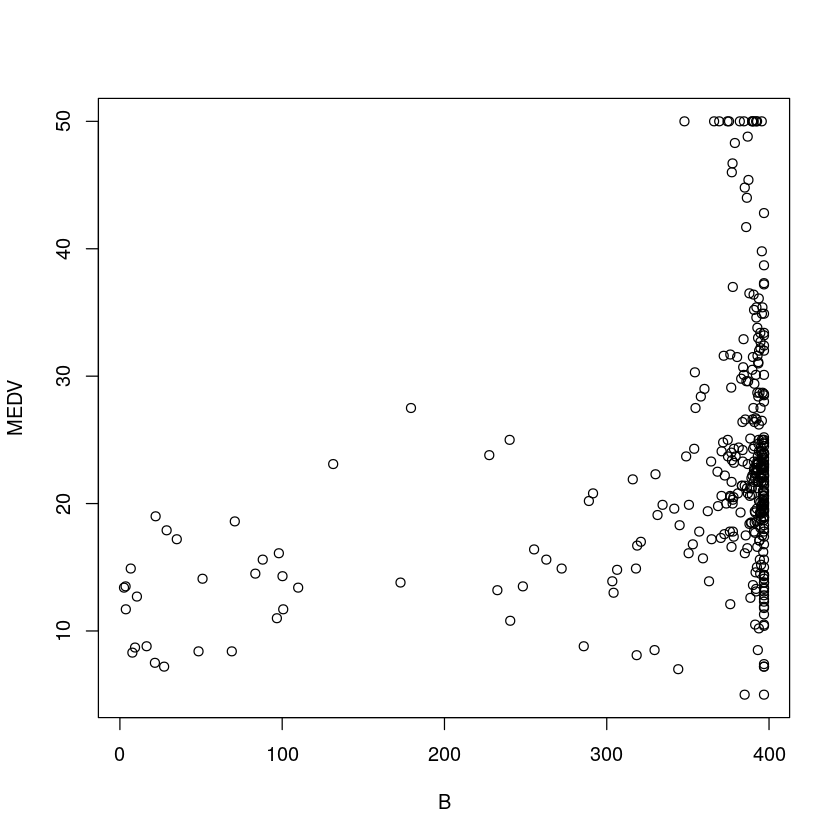

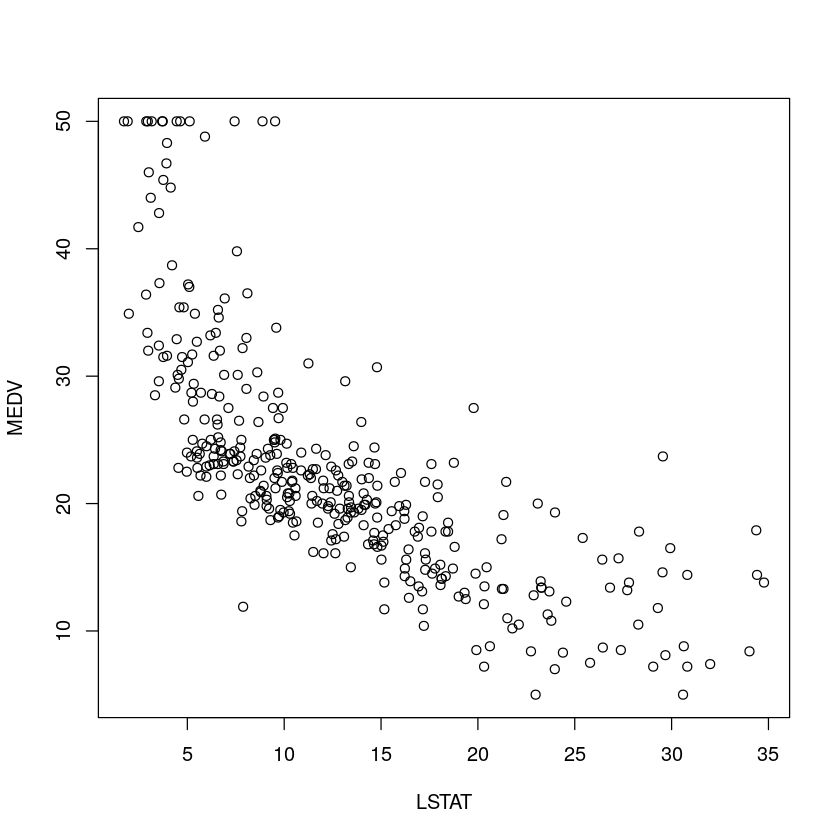

In [16]:
plot(MEDV~., data=trainData)

## 모델 생성 

In [17]:
fit=lm(MEDV~., data=trainData)

In [18]:
fit


Call:
lm(formula = MEDV ~ ., data = trainData)

Coefficients:
(Intercept)         CRIM           ZN        INDUS        CHAS1          NOX  
  29.146597    -0.129718     0.037256     0.049814     4.110468   -15.692769  
         RM          AGE          DIS          RAD          TAX      PTRATIO  
   4.474961    -0.003218    -1.256111     0.291982    -0.011206    -0.892041  
          B        LSTAT  
   0.008002    -0.504941  


In [19]:
fit$coefficients

(Intercept)          CRIM            ZN         INDUS         CHAS1 
 29.146596902  -0.129718440   0.037256214   0.049813535   4.110467509 
          NOX            RM           AGE           DIS           RAD 
-15.692769259   4.474961487  -0.003217851  -1.256111078   0.291982002 
          TAX       PTRATIO             B         LSTAT 
 -0.011206399  -0.892041266   0.008001870  -0.504941395

coefficients는 추정된 계수를 저장함

In [20]:
fit$residuals

1            4            6            7            9           11 
 -5.55231239   4.40248664   3.43574607   0.12076711   5.11259128  -4.24390953 
          12           13           14           16           17           19 
 -2.55900230   0.94243437   0.86295938   0.71409639   2.54576699   4.26157393 
          22           24           25           26           27           28 
  2.08260626   0.85818879  -0.01206189   0.62955543   1.20426328  -0.08669252 
          29           33           35           36           37           38 
 -1.41030226   4.05639910  -0.35611892  -4.30829046  -1.76374732  -1.65932820 
          39           41           42           45           48           49 
  2.10285685   1.04269967  -1.88138879  -1.67924814  -1.34015287   5.57618588 
          50           51           53           54           55           56 
  2.45245245  -1.41864713  -2.79073588  -0.50404152   3.69380166   4.02169130 
          57           58           59           60           61           63 
 -0.02816919  -1.07119231   1.26459531  -1.37558426   0.99115601  -1.96427989 
          64           65           67           69           70           71 
  1.74808810   8.70601804  -5.17016102   0.16054943   0.17390248  -1.34580782 
          72           73           74           75           76           77 
 -0.11105814  -1.82970460  -0.89696063  -1.58467913  -2.71563641  -2.94775567 
          78           79           80           81           82           83 
 -2.53668028  -0.31707246  -2.02231493  -0.41597778  -2.92879124  -0.99682508 
          85           86           88           89           90           91 
 -0.77386655  -1.07806424  -3.12142905  -6.89434031  -2.09299023  -4.02501782 
          93           94           95           96           98          100 
 -5.75006296  -3.69274863  -5.96206627   0.09738238   2.45045615   0.82217377 
         101          102          103          104          109          110 
  2.83452847   0.76889702  -1.47244101  -0.74002025  -2.67862725  -0.15442495 
         111          112          113          115          116          117 
  1.14572191  -3.73940525  -1.45830120  -6.29027912  -1.72333122  -1.91901037 
         118          120          121          122          123          124 
 -4.05692407  -1.00571894   0.19722382  -2.09011508   0.03931799   0.99004703 
         126          127          129          130          131          132 
 -0.92611844   1.29087525  -1.35071597   0.26116047  -1.27885339  -0.17639225 
         135          136          137          138          139          140 
  2.06152748   0.39226418   1.32576360  -2.68597270  -0.64139222   1.09733850 
         142          143          144          145          146          148 
 10.67617172  -2.39370382   3.63792277   3.55467602   1.15096180   6.49870737 
         149          152          155          156          159          160 
  8.27748844   1.62033452  -7.06606438  -6.52783138  -4.18532973  -2.57510894 
         162          163          165          166          167          168 
 12.86355187   7.48642955  -1.61049533  -0.18177811  12.11287162   0.88637246 
         170          173          174          175          176          177 
 -4.26620904   1.29102013  -4.78480887  -2.95178961  -0.96045950  -1.83450550 
         180          181          185          186          187          188 
  4.63684653   4.97781143   4.85969650   5.51099396  13.81424260  -0.80398613 
         189          190          191          192          193          194 
 -2.02999220   0.58792718   6.09041203   0.26294339   3.26099413  -0.73194172 
         195          198          199          201          202          205 
 -2.02200142  -2.20667703   0.04228565   2.16232635  -4.25003093   7.07692815 
         206          209          210          211          212          213 
  0.12394164  -0.43490616   2.23208217  -1.79071833   1.41802457  -1.41339001 
         215          216          217          218          

모델의 residuals는 실제값과 추정값의 차이를 저장함

In [21]:
summary(fit)


Call:
lm(formula = MEDV ~ ., data = trainData)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6525  -2.7052  -0.7319   1.7569  25.3828 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.146597   6.133513   4.752 2.96e-06 ***
CRIM         -0.129718   0.037057  -3.500 0.000525 ***
ZN            0.037256   0.016679   2.234 0.026142 *  
INDUS         0.049814   0.071530   0.696 0.486647    
CHAS1         4.110468   0.998089   4.118 4.78e-05 ***
NOX         -15.692769   4.622949  -3.395 0.000767 ***
RM            4.474961   0.500401   8.943  < 2e-16 ***
AGE          -0.003218   0.015748  -0.204 0.838211    
DIS          -1.256111   0.232909  -5.393 1.29e-07 ***
RAD           0.291982   0.075409   3.872 0.000129 ***
TAX          -0.011206   0.004196  -2.671 0.007927 ** 
PTRATIO      -0.892041   0.159191  -5.604 4.30e-08 ***
B             0.008002   0.003212   2.491 0.013198 *  
LSTAT        -0.504941   0.060355  -8.366 1.50e-15 ***
---
Sign

## 회귀모형의 진단 

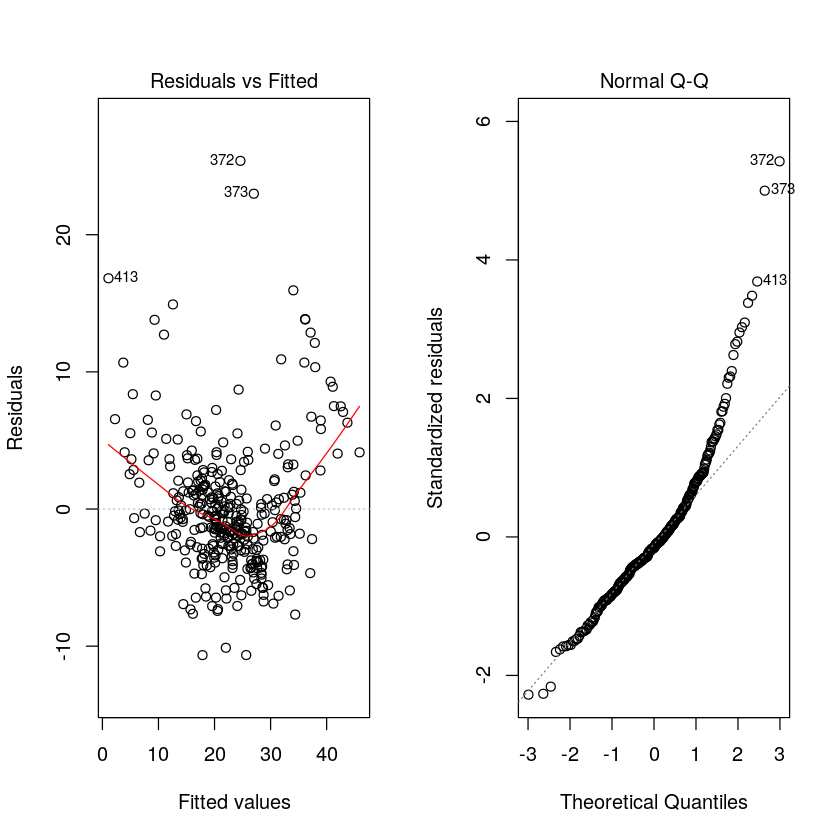

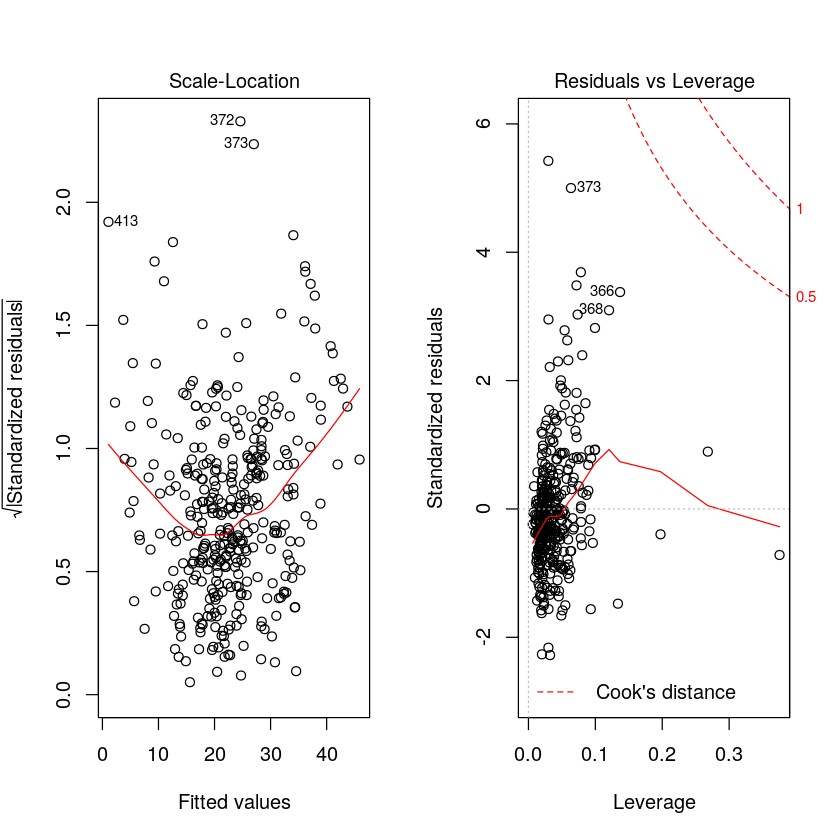

In [22]:
par(mfrow=c(1,2))
plot(fit)

4분할하여 플롯을 그리는데 plot에 회귀모델이 들어가면 위와 같은 플롯이 나타남. 

*Residual 플롯*이 0을 중심으로 랜덤하게 퍼져있으면 분산의 동질성 만족, 어떠한 경향이 존재하면 분산의 동질성과 선형성을 불만족, 또한 아웃라이어의 존재도 확인 가능<br>
위의 플롯을 보았을 때 이 데이터는 선형보다는 2차식을 그리는 것이 적합해보임, 선형회귀로는 잘 추정되지 않음

**Q-Q플롯**은 정규분포를 그리는지 확인하는데 일직선이 되어야 정규분포이다. 근데 이것은 벗어나므로 선형회귀가 적절해 보이지는 않는다.

선형회귀분석의 가정 <br>
1. 잔차의 i.i.d
2. 분산의 동질성
3. 선형성

## test에 적용 

In [23]:
pred_train=predict(fit, trainData)
pred_test =predict(fit, newdata=testData)

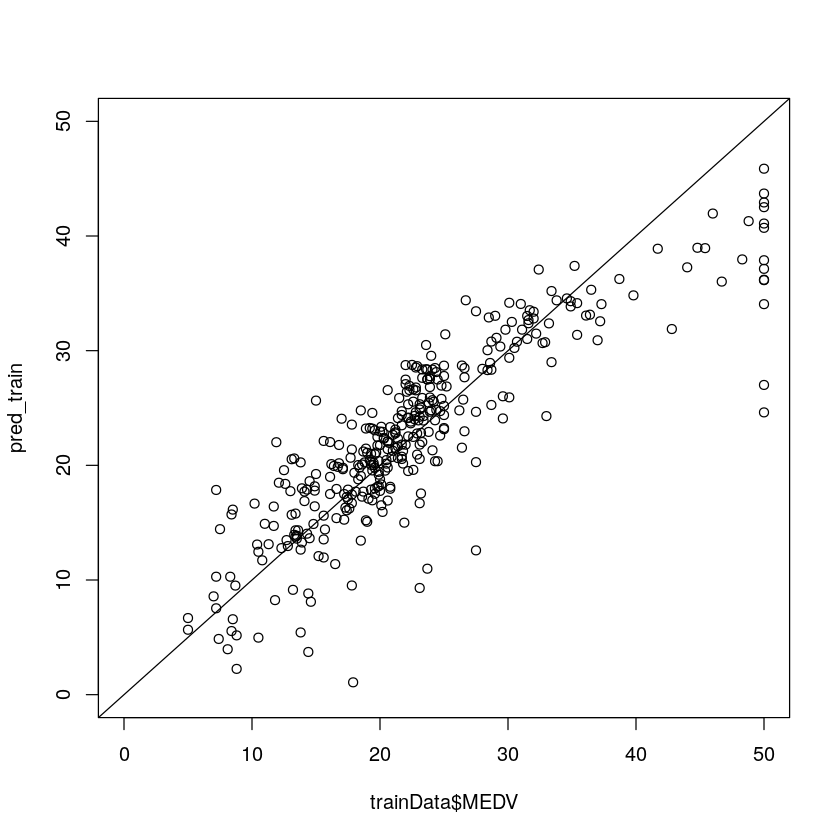

In [24]:
plot(trainData$MEDV,pred_train, xlim=c(0, 50), ylim=c(0,50))
abline(a=0, b=1)

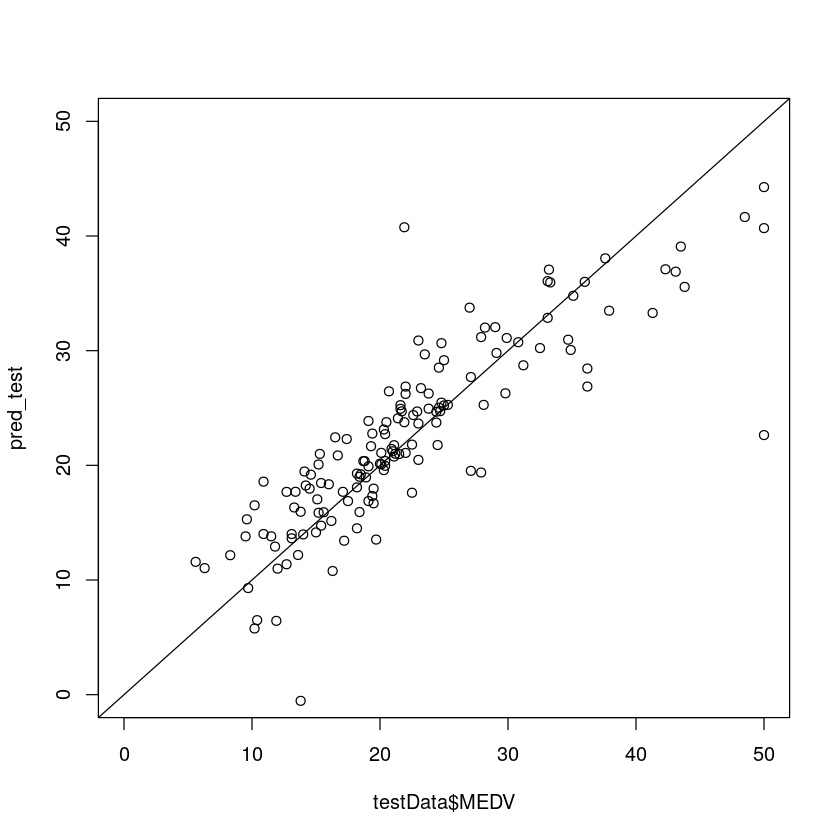

In [25]:
plot(testData$MEDV,pred_test, xlim=c(0, 50), ylim=c(0,50))
abline(a=0, b=1)